In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Rose Wine Data Problem Analysis

In [2]:
rose=pd.read_csv('Rose.csv',parse_dates=True,index_col=['YearMonth'])

In [3]:
rose.head(5)

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [4]:
rose.index

DatetimeIndex(['1980-01-01', '1980-02-01', '1980-03-01', '1980-04-01',
               '1980-05-01', '1980-06-01', '1980-07-01', '1980-08-01',
               '1980-09-01', '1980-10-01',
               ...
               '1994-10-01', '1994-11-01', '1994-12-01', '1995-01-01',
               '1995-02-01', '1995-03-01', '1995-04-01', '1995-05-01',
               '1995-06-01', '1995-07-01'],
              dtype='datetime64[ns]', name='YearMonth', length=187, freq=None)

Text(0.5, 0, 'Fig. No. 2.1.2')

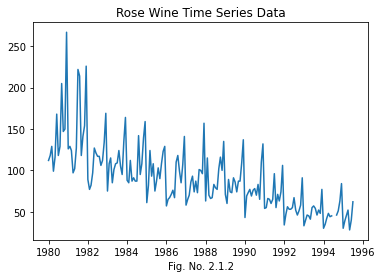

In [5]:
plt.plot(rose)
plt.title('Rose Wine Time Series Data')
plt.xlabel('Fig. No. 2.1.2')

In [6]:
rose.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [7]:
rose.isnull().sum()

Rose    2
dtype: int64

In [8]:
rose.Rose.sort_values(ascending=True)

YearMonth
1995-05-01     28.0
1994-01-01     30.0
1995-01-01     30.0
1993-01-01     33.0
1992-01-01     34.0
              ...  
1981-07-01    222.0
1981-12-01    226.0
1980-12-01    267.0
1994-07-01      NaN
1994-08-01      NaN
Name: Rose, Length: 187, dtype: float64

In [9]:
rose.interpolate(method='spline',order=1,inplace=True)

In [10]:
rose.describe().T

,count,mean,std,min,25%,50%,75%,max
Rose,187.0,89.927087,39.224153,28.0,62.5,85.0,111.0,267.0


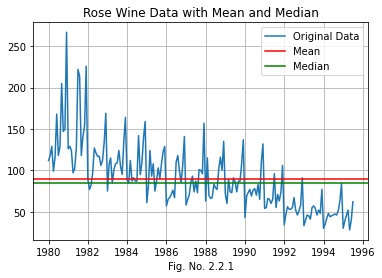

In [11]:
plt.plot(rose,label='Original Data')
plt.axhline(rose['Rose'].mean(),color='red',label='Mean')
plt.axhline(rose['Rose'].median(),color='green',label='Median')
plt.title('Rose Wine Data with Mean and Median')
plt.xlabel('Fig. No. 2.2.1')
plt.legend(loc='best')
plt.grid()

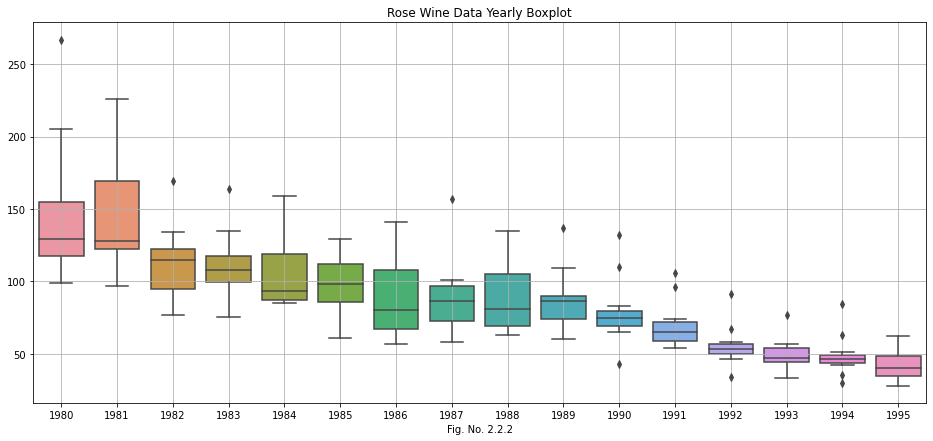

In [12]:
_, ax = plt.subplots(figsize=(16,7))
sns.boxplot(x = rose.index.year,y = rose.values[:,0],ax=ax)
plt.title('Rose Wine Data Yearly Boxplot')
plt.xlabel('Fig. No. 2.2.2')
plt.grid();

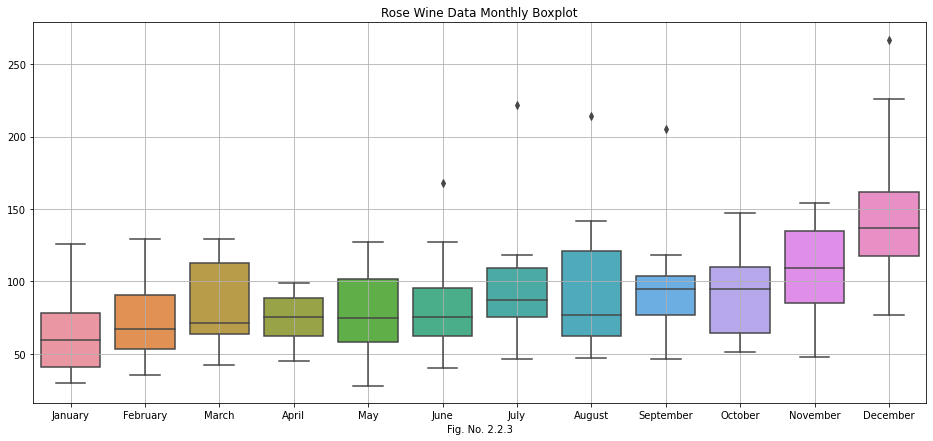

In [13]:
_, ax = plt.subplots(figsize=(16,7))
sns.boxplot(x = rose.index.month_name(),y = rose.values[:,0],ax=ax)
plt.title('Rose Wine Data Monthly Boxplot')
plt.xlabel('Fig. No. 2.2.3')
plt.grid();

In [14]:
monthly_sales_across_years = pd.pivot_table(rose, values = 'Rose', columns = rose.index.month_name(), index = rose.index.year)
monthly_sales_across_years

YearMonth,April,August,December,February,January,July,June,March,May,November,October,September
YearMonth,,,,,,,,,,,,
1980,99.0,129.000000,267.0,118.0,112.0,118.000000,168.0,129.0,116.0,150.0,147.0,205.0
1981,97.0,214.000000,226.0,129.0,126.0,222.000000,127.0,124.0,102.0,154.0,141.0,118.0
1982,97.0,117.000000,169.0,77.0,89.0,117.000000,121.0,82.0,127.0,134.0,112.0,106.0
1983,85.0,124.000000,164.0,108.0,75.0,109.000000,108.0,115.0,101.0,135.0,95.0,105.0
1984,87.0,142.000000,159.0,85.0,88.0,87.000000,87.0,112.0,91.0,139.0,108.0,95.0
1985,93.0,103.000000,129.0,82.0,61.0,87.000000,75.0,124.0,108.0,123.0,108.0,90.0
1986,71.0,118.000000,141.0,65.0,57.0,110.000000,67.0,67.0,76.0,107.0,85.0,99.0
1987,86.0,73.000000,157.0,65.0,58.0,87.000000,74.0,70.0,93.0,96.0,100.0,101.0
1988,66.0,77.000000,135.0,115.0,63.0,79.000000,83.0,70.0,67.0,100.0,116.0,102.0


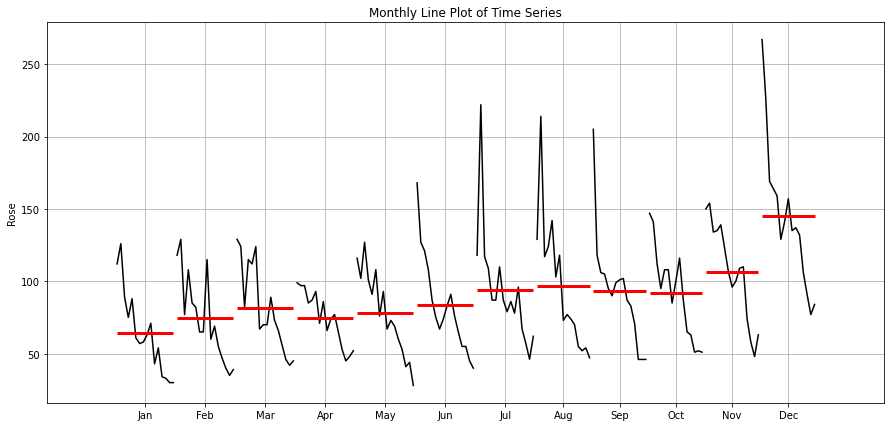

In [15]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(15,7))

month_plot(rose,ylabel='Rose',ax=ax)
plt.title('Monthly Line Plot of Time Series')
plt.grid();

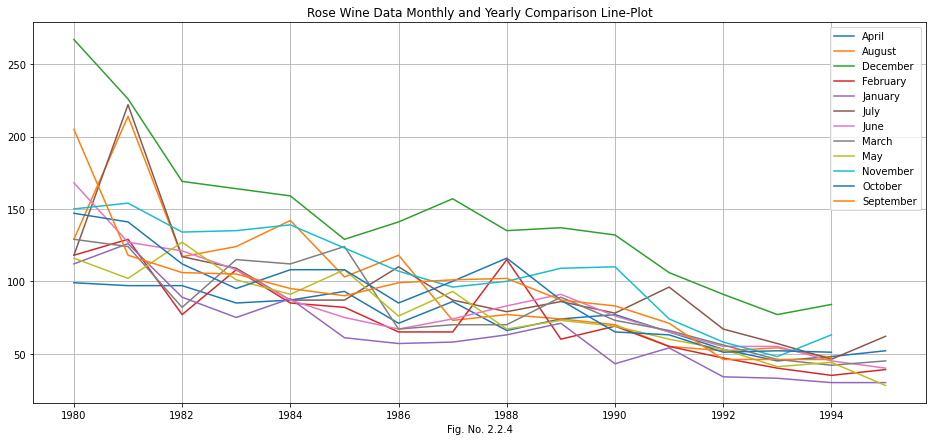

In [16]:
monthly_sales_across_years.plot(figsize=(16,7))
plt.title('Rose Wine Data Monthly and Yearly Comparison Line-Plot')
plt.xlabel('Fig. No. 2.2.4')
plt.grid()
plt.legend(loc='best');

### Model Decomposition
#### Additive

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [18]:
rose_add=seasonal_decompose(rose,model='additive')

Text(0.5, 14.999999999999972, 'Additive Decompose for Rose Wine Data')

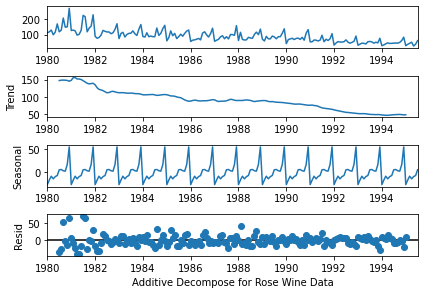

In [19]:
rose_add.plot();
plt.xlabel('Additive Decompose for Rose Wine Data')

In [20]:
print(rose_add.trend.head(5))
print(rose_add.seasonal.head(5))
print(rose_add.resid.head(5))

YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
Name: trend, dtype: float64
YearMonth
1980-01-01   -27.921780
1980-02-01   -17.445103
1980-03-01    -9.299901
1980-04-01   -15.112401
1980-05-01   -10.210615
Name: seasonal, dtype: float64
YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
Name: resid, dtype: float64


#### Multiplicative

In [21]:
from pylab import rcParams
rcParams['figure.figsize']=15,7

In [22]:
rose_mul=seasonal_decompose(rose,model='multiplicative')

Text(0.5, 41.99999999999994, 'Multiplicative Decompose for Rose Wine Data')

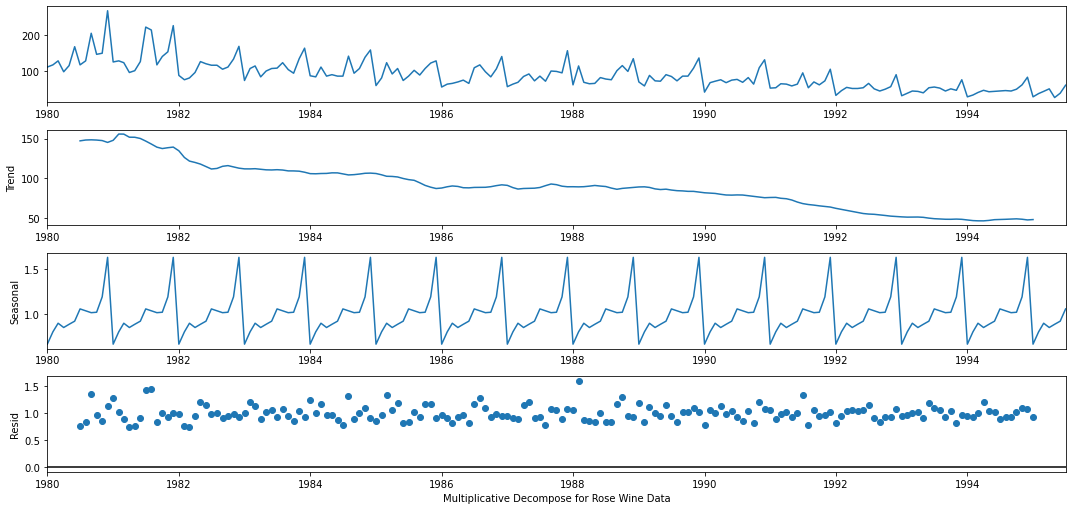

In [23]:
rose_mul.plot();
plt.xlabel('Multiplicative Decompose for Rose Wine Data')

In [24]:
print(rose_mul.trend.head(5))
print(rose_mul.seasonal.head(5))
print(rose_mul.resid.head(5))

YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
Name: trend, dtype: float64
YearMonth
1980-01-01    0.669946
1980-02-01    0.806019
1980-03-01    0.900899
1980-04-01    0.853719
1980-05-01    0.889143
Name: seasonal, dtype: float64
YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
Name: resid, dtype: float64


### Split the Data into Test and Train Set

In [25]:
train=rose[rose.index<'1991']
test=rose[rose.index>='1991']

In [26]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [27]:
print('Top 5 Rows of Train Data\n',train.head(5))
print('Top 5 Rows of Test Data\n',test.head(5))

Top 5 Rows of Train Data
              Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0
Top 5 Rows of Test Data
             Rose
YearMonth       
1991-01-01  54.0
1991-02-01  55.0
1991-03-01  66.0
1991-04-01  65.0
1991-05-01  60.0


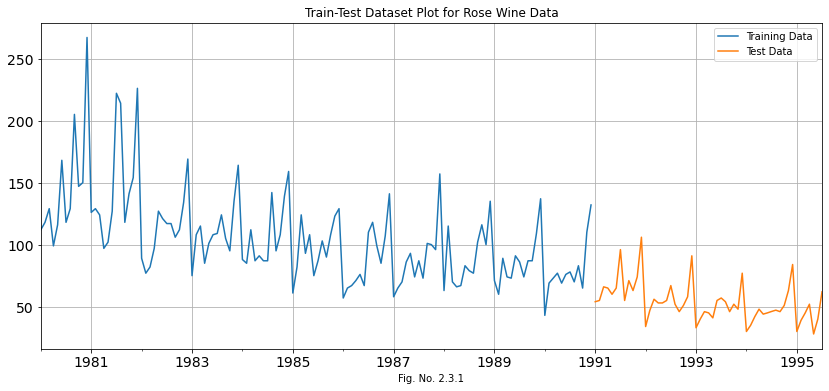

In [28]:
train['Rose'].plot(figsize=(14,6), fontsize=14)
test['Rose'].plot(figsize=(14,6), fontsize=14)
plt.grid()
plt.title('Train-Test Dataset Plot for Rose Wine Data')
plt.xlabel('Fig. No. 2.3.1')
plt.legend(['Training Data','Test Data'])
plt.show()

### Model 1 Linear Regression

In [29]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [30]:
from sklearn.linear_model import LinearRegression
LinearRegression_train=train.copy()
LinearRegression_test=test.copy()

In [31]:
LinearRegression_train['time']=train_time
LinearRegression_test['time']=test_time

In [32]:
LinearRegression_test.head(5)

,Rose,time
YearMonth,,
1991-01-01,54.0,133
1991-02-01,55.0,134
1991-03-01,66.0,135
1991-04-01,65.0,136
1991-05-01,60.0,137


In [33]:
lr=LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train.Rose)

LinearRegression()

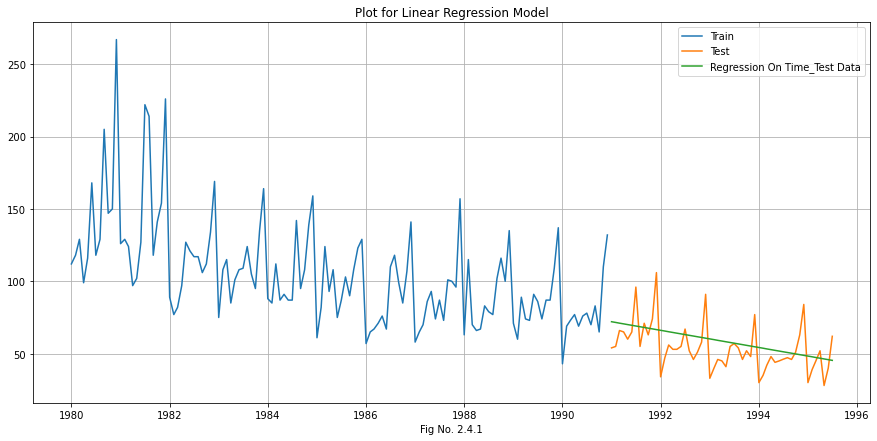

In [34]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(15,7))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.title('Plot for Linear Regression Model')
plt.xlabel('Fig No. 2.4.1')
plt.legend(loc='best')
plt.grid();

### Model Evaluation

In [35]:
from sklearn import metrics

In [36]:
rmse_lr_test=metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
result_lr=pd.DataFrame({'Test RMSE':[rmse_lr_test]},index=['RegressionOnTime'])
result_lr

,Test RMSE
RegressionOnTime,15.255492


### Naive Approach

In [37]:
Naive_Bayes_Train=train.copy()
Naive_Bayes_Test=test.copy()

In [38]:
last_train_value=np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
Naive_Bayes_Test['Naive']=last_train_value

In [39]:
Naive_Bayes_Train.tail()

,Rose
YearMonth,
1990-08-01,70.0
1990-09-01,83.0
1990-10-01,65.0
1990-11-01,110.0
1990-12-01,132.0


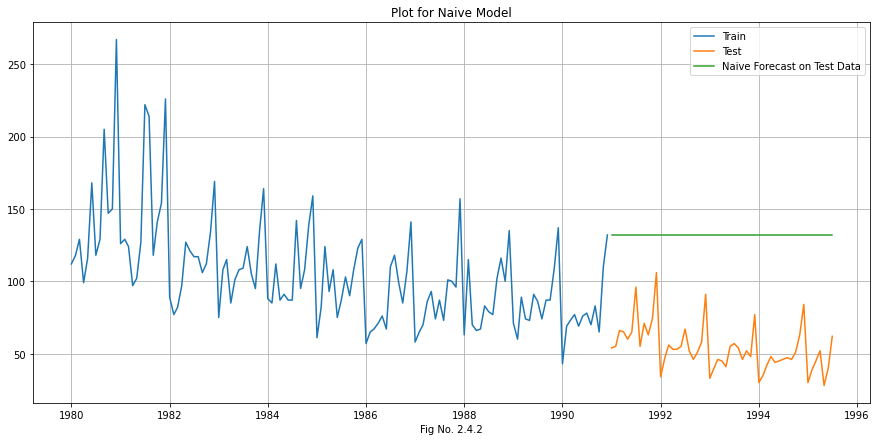

In [40]:
plt.figure(figsize=(15,7))
plt.plot(Naive_Bayes_Train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(Naive_Bayes_Test['Naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title('Plot for Naive Model')
plt.xlabel('Fig No. 2.4.2')
plt.grid();

### Model Evaluation

In [41]:
## Test Data - RMSE
rmse_naive_test=metrics.mean_squared_error(test['Rose'],Naive_Bayes_Test['Naive'],squared=False)
result_naive=pd.DataFrame({'Test RMSE':[rmse_naive_test]},index=['NaiveOnTime'])
result_df=pd.concat([result_lr,result_naive])
result_df

,Test RMSE
RegressionOnTime,15.255492
NaiveOnTime,79.672475


### Simple Average

In [42]:
Simple_Average_Train=train.copy()
Simple_Average_Test=test.copy()

In [43]:
Simple_Average_Test['Avg']=train['Rose'].mean()

In [44]:
Simple_Average_Test.head(5)

,Rose,Avg
YearMonth,,
1991-01-01,54.0,104.939394
1991-02-01,55.0,104.939394
1991-03-01,66.0,104.939394
1991-04-01,65.0,104.939394
1991-05-01,60.0,104.939394


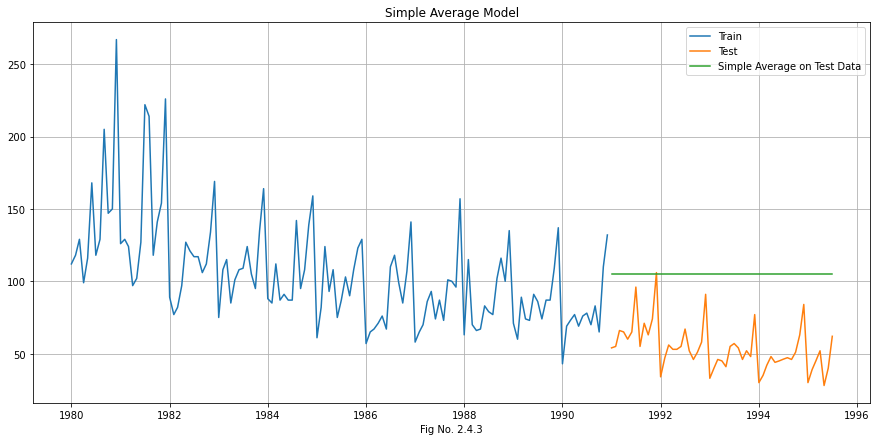

In [45]:
plt.figure(figsize=(15,7))
plt.plot(Simple_Average_Train['Rose'], label='Train')
plt.plot(Simple_Average_Test['Rose'], label='Test')
plt.plot(Simple_Average_Test['Avg'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Model")
plt.xlabel('Fig No. 2.4.3')
plt.grid();

### Model Evaluation

In [46]:
## Test Data - RMSE
rmse_simple_test=metrics.mean_squared_error(test['Rose'],Simple_Average_Test['Avg'],squared=False)
result_simple=pd.DataFrame({'Test RMSE':[rmse_simple_test]},index=['SimpleAverage'])
result_df1=pd.concat([result_df,result_simple])
result_df1

,Test RMSE
RegressionOnTime,15.255492
NaiveOnTime,79.672475
SimpleAverage,53.413298


### Moving Average

In [47]:
Moving_Average=rose.copy()

In [48]:
Moving_Average['Trailing2']=Moving_Average['Rose'].rolling(2).mean()
Moving_Average['Trailing4']=Moving_Average['Rose'].rolling(4).mean()
Moving_Average['Trailing6']=Moving_Average['Rose'].rolling(6).mean()
Moving_Average['Trailing9']=Moving_Average['Rose'].rolling(9).mean()

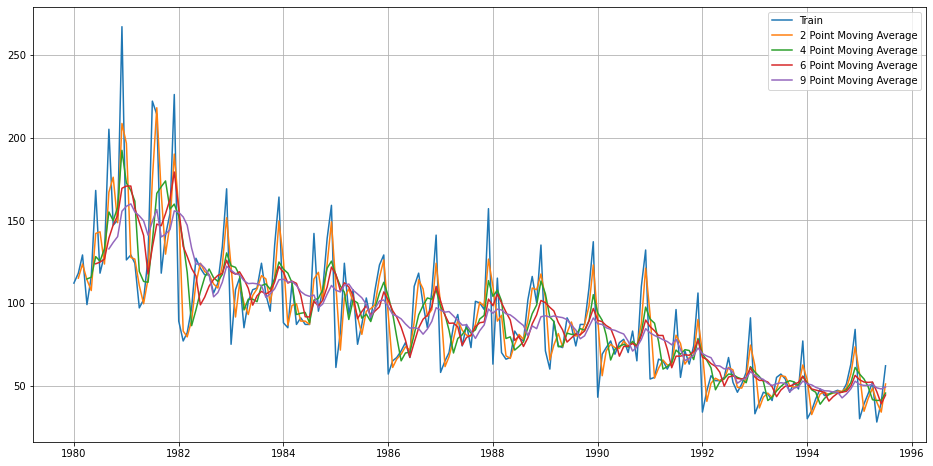

In [49]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(Moving_Average['Rose'], label='Train')
plt.plot(Moving_Average['Trailing2'], label='2 Point Moving Average')
plt.plot(Moving_Average['Trailing4'], label='4 Point Moving Average')
plt.plot(Moving_Average['Trailing6'],label = '6 Point Moving Average')
plt.plot(Moving_Average['Trailing9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [50]:
Moving_Average.head(5)

,Rose,Trailing2,Trailing4,Trailing6,Trailing9
YearMonth,,,,,
1980-01-01,112.0,NaN,NaN,NaN,NaN
1980-02-01,118.0,115.0,NaN,NaN,NaN
1980-03-01,129.0,123.5,NaN,NaN,NaN
1980-04-01,99.0,114.0,114.5,NaN,NaN
1980-05-01,116.0,107.5,115.5,NaN,NaN


In [51]:
Moving_Average_Train=Moving_Average[Moving_Average.index<'1991']
Moving_Average_Test=Moving_Average[Moving_Average.index>='1991']

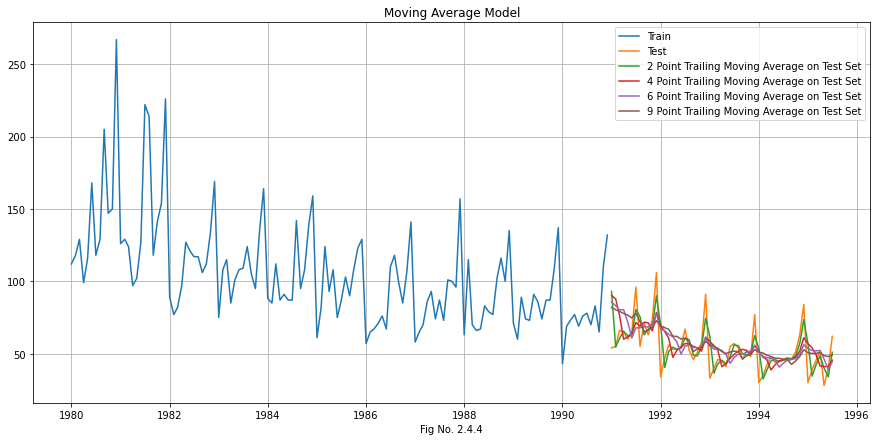

In [52]:
## Plotting on both the Training and Test data

plt.figure(figsize=(15,7))
plt.plot(Moving_Average_Train['Rose'], label='Train')
plt.plot(Moving_Average_Test['Rose'], label='Test')


plt.plot(Moving_Average_Test['Trailing2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(Moving_Average_Test['Trailing4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(Moving_Average_Test['Trailing6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(Moving_Average_Test['Trailing9'],label = '9 Point Trailing Moving Average on Test Set')
plt.title("Moving Average Model")
plt.xlabel('Fig No. 2.4.4')
plt.legend(loc = 'best')
plt.grid();

### Model Evaluation

In [53]:
rmse_ma_trail2=metrics.mean_squared_error(test['Rose'],Moving_Average_Test['Trailing2'],squared=False)
print('For 2 Point Trailing Average RMSE',rmse_ma_trail2)

rmse_ma_trail4=metrics.mean_squared_error(test['Rose'],Moving_Average_Test['Trailing4'],squared=False)
print('For 4 Point Trailing Average RMSE',rmse_ma_trail4)

rmse_ma_trail6=metrics.mean_squared_error(test['Rose'],Moving_Average_Test['Trailing6'],squared=False)
print('For 6 Point Trailing Average RMSE',rmse_ma_trail6)

rmse_ma_trail9=metrics.mean_squared_error(test['Rose'],Moving_Average_Test['Trailing9'],squared=False)
print('For 9 Point Trailing Average RMSE',rmse_ma_trail9)

For 2 Point Trailing Average RMSE 11.529984583314269
For 4 Point Trailing Average RMSE 14.4443746776487
For 6 Point Trailing Average RMSE 14.554986179160544
For 9 Point Trailing Average RMSE 14.721519871470589


In [54]:
result_ma=pd.DataFrame({'Test RMSE': [rmse_ma_trail2,rmse_ma_trail4,
                                     rmse_ma_trail6,rmse_ma_trail9]},index=['2 Point Trailing on Test Data','4 Point Trailing on Test Data',
                                                                           '6 Point Trailing on Test Data','9 Point Trailing on Test Data'])

result=pd.concat([result_df1,result_ma])
result

,Test RMSE
RegressionOnTime,15.255492
NaiveOnTime,79.672475
SimpleAverage,53.413298
2 Point Trailing on Test Data,11.529985
4 Point Trailing on Test Data,14.444375
6 Point Trailing on Test Data,14.554986
9 Point Trailing on Test Data,14.721520


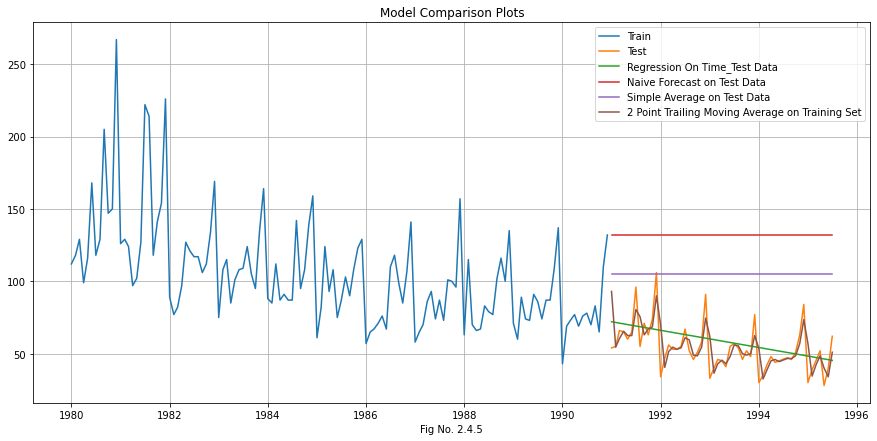

In [55]:
## Plotting on both Training and Test data

plt.figure(figsize=(15,7))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(Naive_Bayes_Test['Naive'], label='Naive Forecast on Test Data')

plt.plot(Simple_Average_Test['Avg'], label='Simple Average on Test Data')

plt.plot(Moving_Average_Test['Trailing2'], label='2 Point Trailing Moving Average on Training Set')
plt.xlabel('Fig No. 2.4.5')

plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

## Exponential Smoothing
### Simple Exponential Smoothing

In [56]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [57]:
SES_train=train.copy()
SES_test=test.copy()

In [58]:
#creat class
model_SES=SimpleExpSmoothing(train,initialization_method='estimated')
model_SES_fit=model_SES.fit(optimized=True)
model_SES_fit.params

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


{'smoothing_level': 0.09874984903268463,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.3869689447322,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [59]:
#prediction
SES_predict=model_SES_fit.forecast(steps=len(test))

In [60]:
SES_predict.head(5)

1991-01-01    87.104998
1991-02-01    87.104998
1991-03-01    87.104998
1991-04-01    87.104998
1991-05-01    87.104998
Freq: MS, dtype: float64

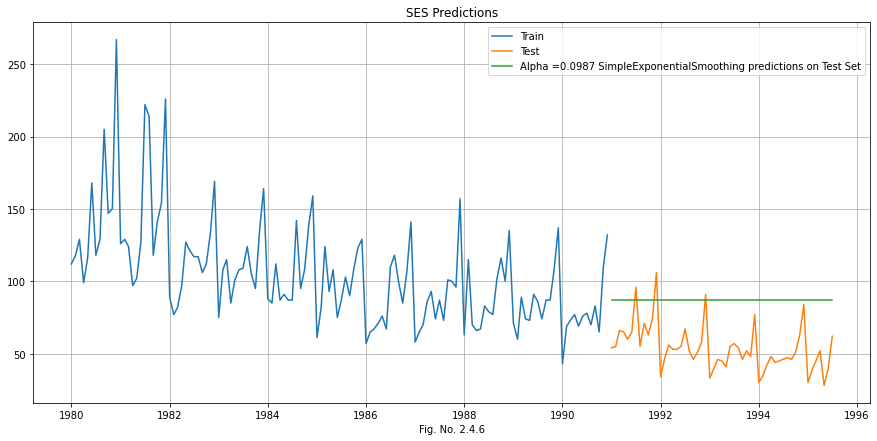

In [61]:
## Plotting on both the Training and Test data

plt.figure(figsize=(15,7))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_predict, label='Alpha =0.0987 SimpleExponentialSmoothing predictions on Test Set')
plt.xlabel('Fig. No. 2.4.6')
plt.legend(loc='best')
plt.grid()
plt.title('SES Predictions');

### Model Evaluation

In [62]:
## Test Data
rmse_SES=metrics.mean_squared_error(test['Rose'],SES_predict,squared=False)
rmse_SES_df=pd.DataFrame(rmse_SES,index=['Alpha=0.0987 SimpleExponentialSmoothing'],columns=['Test RMSE'])
rmse_SES_df

,Test RMSE
Alpha=0.0987 SimpleExponentialSmoothing,36.748402


### Double Exponential Smoothing

In [63]:
DES_train=train.copy()
DES_test=test.copy()

In [64]:
#creat class
model_DES=Holt(train,initialization_method='estimated')
model_DES_fit=model_DES.fit(optimized=True)
model_DES_fit.params

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


{'smoothing_level': 1.4901161193847656e-08,
 'smoothing_trend': 0.0,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 137.8155475230004,
 'initial_trend': -0.4943783477354779,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [65]:
DES_predict=model_DES_fit.forecast(steps=len(test))

In [66]:
DES_predict.head(5)

1991-01-01    72.063227
1991-02-01    71.568849
1991-03-01    71.074471
1991-04-01    70.580092
1991-05-01    70.085714
Freq: MS, dtype: float64

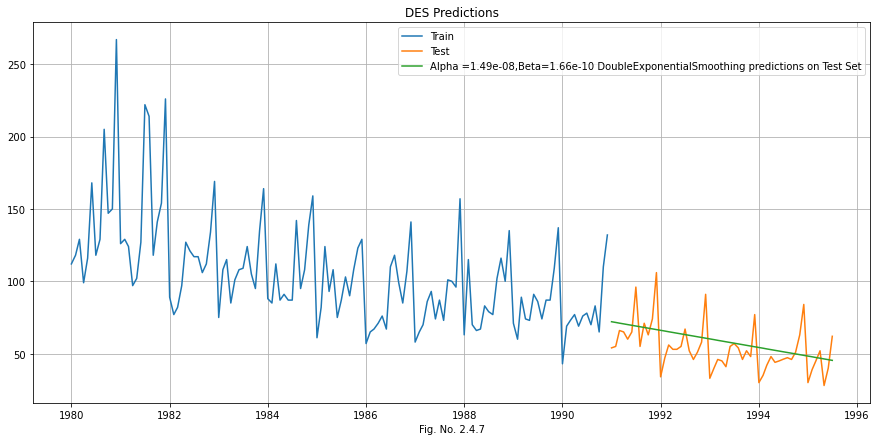

In [67]:
## Plotting on both the Training and Test data

plt.figure(figsize=(15,7))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_predict, label='Alpha =1.49e-08,Beta=1.66e-10 DoubleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.xlabel('Fig. No. 2.4.7')
plt.grid()
plt.title('DES Predictions');

In [68]:
## Test Data
rmse_DES=metrics.mean_squared_error(test['Rose'],DES_predict,squared=False)
rmse_DES_df=pd.DataFrame(rmse_DES,index=['Alpha =1.49e-08,Beta=1.66e-10 DoubleExponentialSmoothing'],columns=['Test RMSE'])
result_With_DES=pd.concat([rmse_SES_df,rmse_DES_df])
result_With_DES

,Test RMSE
Alpha=0.0987 SimpleExponentialSmoothing,36.748402
"Alpha =1.49e-08,Beta=1.66e-10 DoubleExponentialSmoothing",15.255476


### Triple Exponential Smoothing

In [69]:
TES_train=train.copy()
TES_test=test.copy()

In [70]:
#creat class
model_TES=ExponentialSmoothing(train,trend='additive',seasonal='multiplicative',initialization_method='estimated')
model_TES_fit=model_TES.fit(optimized=True)
model_TES_fit.params

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


{'smoothing_level': 0.06621892536991639,
 'smoothing_trend': 0.05130241597404643,
 'smoothing_seasonal': 2.6732907021486167e-07,
 'damping_trend': nan,
 'initial_level': 126.39721935732165,
 'initial_trend': -0.7794874071912484,
 'initial_seasons': array([0.89177529, 1.01159891, 1.1054501 , 0.96614341, 1.08623824,
        1.18412446, 1.3017767 , 1.38469327, 1.31294464, 1.28483844,
        1.49775256, 2.06558486]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [71]:
TES_predict=model_TES_fit.forecast(steps=len(test))

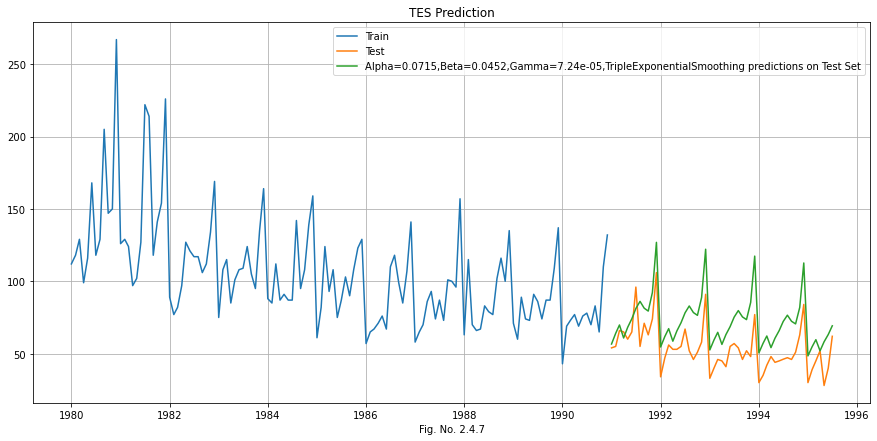

In [72]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(15,7))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_predict, label='Alpha=0.0715,Beta=0.0452,Gamma=7.24e-05,TripleExponentialSmoothing predictions on Test Set')
plt.xlabel('Fig. No. 2.4.7')
plt.title('TES Prediction')

plt.legend(loc='best')
plt.grid();

In [73]:
## Test Data
rmse_TES=metrics.mean_squared_error(test['Rose'],TES_predict,squared=False)
rmse_TES_df=pd.DataFrame(rmse_TES,index=['Alpha=0.0715,Beta=0.0452,Gamma=7.24e-05 TripleExponentialSmoothing'],columns=['Test RMSE'])
result_With_TES=pd.concat([result_With_DES,rmse_TES_df])
result_With_TES

,Test RMSE
Alpha=0.0987 SimpleExponentialSmoothing,36.748402
"Alpha =1.49e-08,Beta=1.66e-10 DoubleExponentialSmoothing",15.255476
"Alpha=0.0715,Beta=0.0452,Gamma=7.24e-05 TripleExponentialSmoothing",20.890315


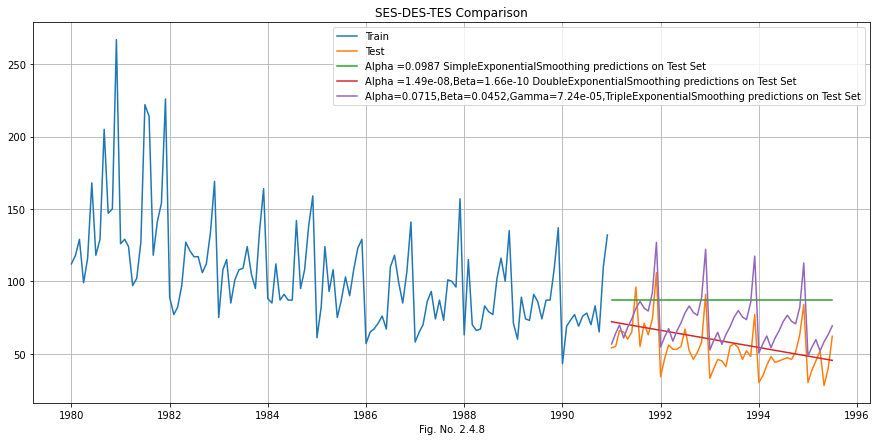

In [74]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(15,7))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(SES_predict, label='Alpha =0.0987 SimpleExponentialSmoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha =1.49e-08,Beta=1.66e-10 DoubleExponentialSmoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.0715,Beta=0.0452,Gamma=7.24e-05,TripleExponentialSmoothing predictions on Test Set')

plt.xlabel('Fig. No. 2.4.8')
plt.title('SES-DES-TES Comparison')
plt.legend(loc='best')
plt.grid();

In [75]:
result_rose=pd.concat([result,result_With_TES])
result_rose

,Test RMSE
RegressionOnTime,15.255492
NaiveOnTime,79.672475
SimpleAverage,53.413298
2 Point Trailing on Test Data,11.529985
4 Point Trailing on Test Data,14.444375
6 Point Trailing on Test Data,14.554986
9 Point Trailing on Test Data,14.721520
Alpha=0.0987 SimpleExponentialSmoothing,36.748402
"Alpha =1.49e-08,Beta=1.66e-10 DoubleExponentialSmoothing",15.255476
"Alpha=0.0715,Beta=0.0452,Gamma=7.24e-05 TripleExponentialSmoothing",20.890315


## Check for stationarity of the whole Time Series data.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [76]:
from statsmodels.tsa.stattools import adfuller
rosetest = adfuller(rose['Rose'],regression='ct',autolag='t-stat')
print('Rose Data test statistic is %3.3f' %rosetest[0])
print('Rose Data test p-value is' ,rosetest[1])
print('Number of lags used' ,rosetest[2])
print('Number of Observation Used',rosetest[3])
print('Critical Values',rosetest[4])

Rose Data test statistic is -2.394
Rose Data test p-value is 0.3830431487073646
Number of lags used 12
Number of Observation Used 174
Critical Values {'1%': -4.011763737803776, '5%': -3.4360292512258863, '10%': -3.1420436590266103}


We see that at 5% significant level the Time Series is non-stationary.

There are various ways that Python allows us to select the appropriate number of lags at which we check whether the Time Series is stationary. To know more about the how to select the various ways, please refer to the link over $\href{https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html}{here}$.

Let us take one level of differencing to see whether the series becomes stationary.

In [77]:
rosetest = adfuller(rose['Rose'].diff().dropna(),regression='ct',autolag='t-stat')
print('Rose Data test statistic is %3.3f' %rosetest[0])
print('Rose Data test p-value is' ,rosetest[1])
print('Number of lags used' ,rosetest[2])
print('Number of Observation Used',rosetest[3])
print('Critical Values',rosetest[4])

Rose Data test statistic is -8.402
Rose Data test p-value is 8.415846763882498e-12
Number of lags used 11
Number of Observation Used 174
Critical Values {'1%': -4.011763737803776, '5%': -3.4360292512258863, '10%': -3.1420436590266103}


In [78]:
rose1=rose.copy()

In [79]:
rose1['Differencing']=rose.diff()

In [80]:
rose1.head()

,Rose,Differencing
YearMonth,,
1980-01-01,112.0,NaN
1980-02-01,118.0,6.0
1980-03-01,129.0,11.0
1980-04-01,99.0,-30.0
1980-05-01,116.0,17.0


Text(0.5, 0, 'Fig. No. 2.5.1')

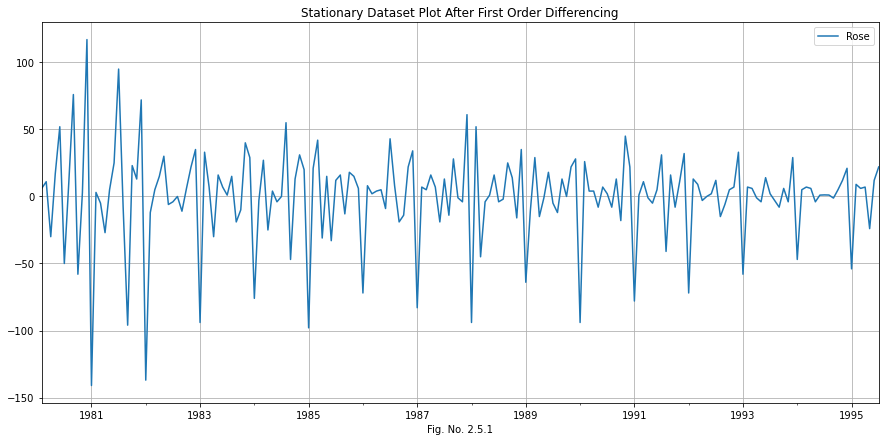

In [81]:
rose.diff().dropna().plot(grid=True);
plt.title('Stationary Dataset Plot After First Order Differencing')
plt.xlabel('Fig. No. 2.5.1')

## Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [82]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

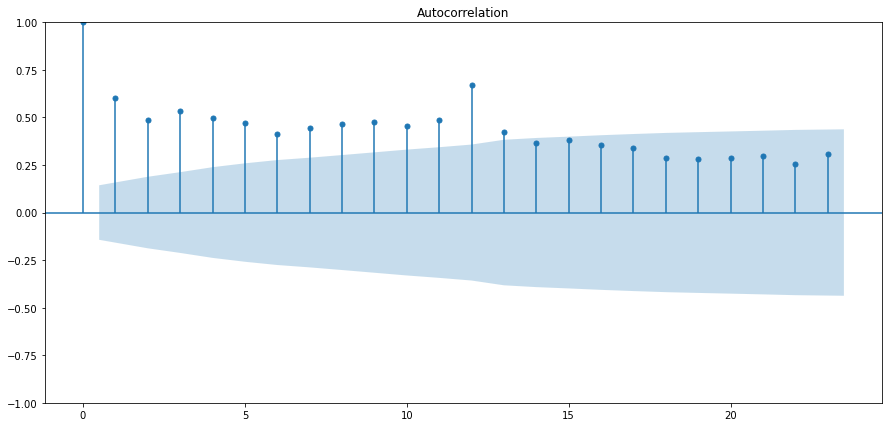

In [83]:
plot_acf(rose,alpha=0.05);

From the above plots, we can say that there seems to be a seasonality in the data.

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


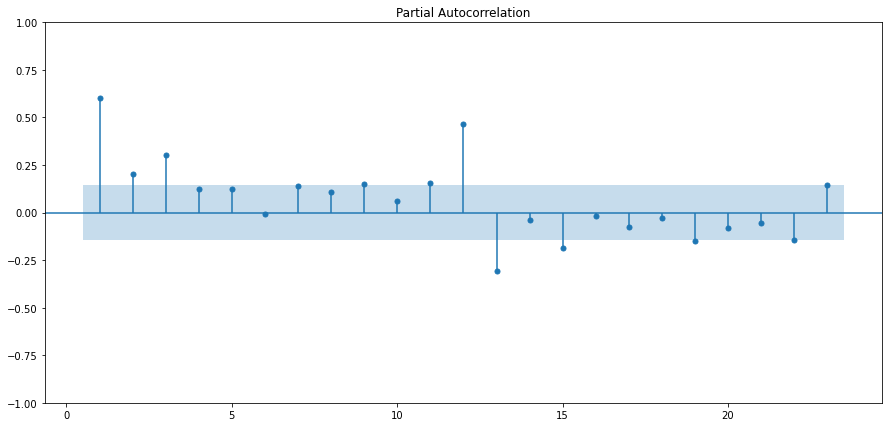

In [84]:
plot_pacf(rose,zero=False,alpha=0.05);

In [85]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [86]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


Last few rows of Training Data


,Rose
YearMonth,
1990-08-01,70.0
1990-09-01,83.0
1990-10-01,65.0
1990-11-01,110.0
1990-12-01,132.0


First few rows of Test Data


,Rose
YearMonth,
1991-01-01,54.0
1991-02-01,55.0
1991-03-01,66.0
1991-04-01,65.0
1991-05-01,60.0


Last few rows of Test Data


,Rose
YearMonth,
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0


In [87]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


## Check for stationarity of the Training Data Time Series.

Let us plot the training data once.

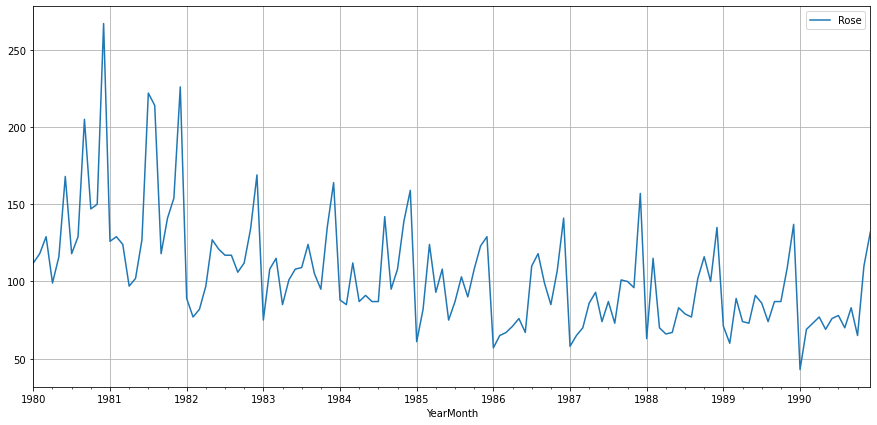

In [88]:
train.plot(grid=True);

In [89]:
dftest = adfuller(train,regression='ct')
print('Train Dataset test statistic is %3.3f' %dftest[0])
print('Train Dataset test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

Train Dataset test statistic is -1.686
Train Dataset test p-value is 0.7569093051047115
Number of lags used 13


The training data is non-stationary at 95% confidence level. Let us take a first level of differencing to stationarize the Time Series.

In [90]:
dftest = adfuller(train.diff().dropna(),regression='ct')
print('Train Dataset test statistic is %3.3f' %dftest[0])
print('Train Dataset test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

Train Dataset test statistic is -6.804
Train Dataset test p-value is 3.89483135678184e-08
Number of lags used 12


Now, let us go ahead and plot the differenced training data.

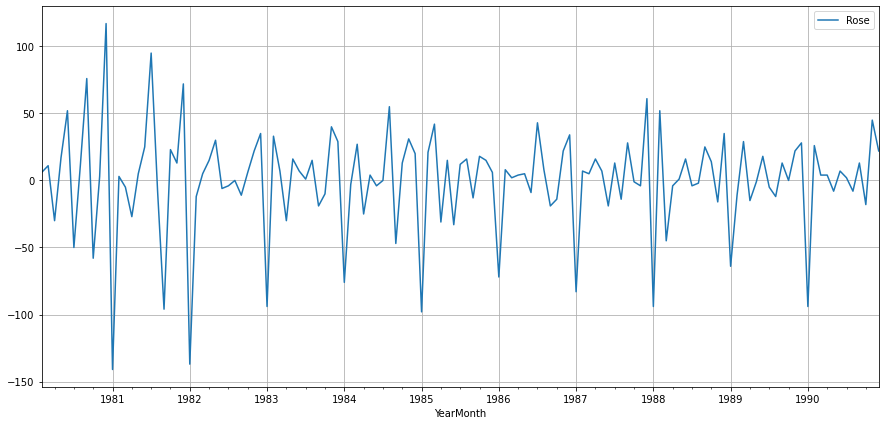

In [91]:
train.diff().dropna().plot(grid=True);

In [92]:
import warnings
warnings.filterwarnings('ignore')

## Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [93]:
import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [94]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [95]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748299
ARIMA(0, 1, 2) - AIC:1279.6715288535756
ARIMA(0, 1, 3) - AIC:1280.5453761734666
ARIMA(1, 1, 0) - AIC:1317.3503105381506
ARIMA(1, 1, 1) - AIC:1280.5742295380073
ARIMA(1, 1, 2) - AIC:1279.8707234231915
ARIMA(1, 1, 3) - AIC:1281.8707223309978
ARIMA(2, 1, 0) - AIC:1298.6110341604915
ARIMA(2, 1, 1) - AIC:1281.507862186848
ARIMA(2, 1, 2) - AIC:1281.870722226461
ARIMA(2, 1, 3) - AIC:1274.695273239774
ARIMA(3, 1, 0) - AIC:1297.4810917271716
ARIMA(3, 1, 1) - AIC:1282.419277627187
ARIMA(3, 1, 2) - AIC:1283.7207405977124
ARIMA(3, 1, 3) - AIC:1278.658802649672


In [96]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
11,"(2, 1, 3)",1274.695273
15,"(3, 1, 3)",1278.658803
2,"(0, 1, 2)",1279.671529
6,"(1, 1, 2)",1279.870723
3,"(0, 1, 3)",1280.545376


In [97]:
auto_ARIMA = ARIMA(train, order=(2,1,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.348
Date:                Sun, 19 Feb 2023   AIC                           1274.695
Time:                        22:09:49   BIC                           1291.946
Sample:                    01-01-1980   HQIC                          1281.705
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6774      0.084    -19.998      0.000      -1.842      -1.513
ar.L2         -0.7282      0.084     -8.679      0.000      -0.893      -0.564
ma.L1          1.0448      0.631      1.656      0.0

Diagnostics plot.

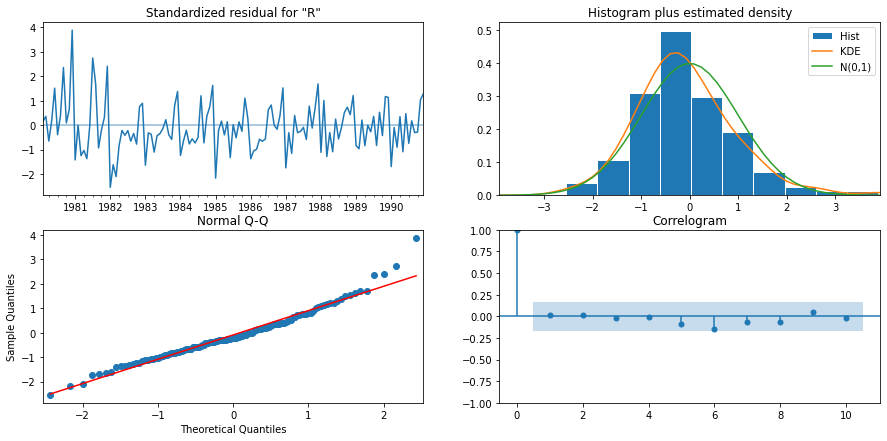

In [98]:
results_auto_ARIMA.plot_diagnostics();

## Predict on the Test Set using this model and evaluate the model.

In [99]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [100]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [101]:
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 36.76975247129802 
MAPE: 75.67250157221339


In [102]:
resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA Auto(2,1,3)'])

resultsDf

,RMSE,MAPE
"ARIMA Auto(2,1,3)",36.769752,75.672502


## Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

Let us look at the ACF and the PACF plots once more.

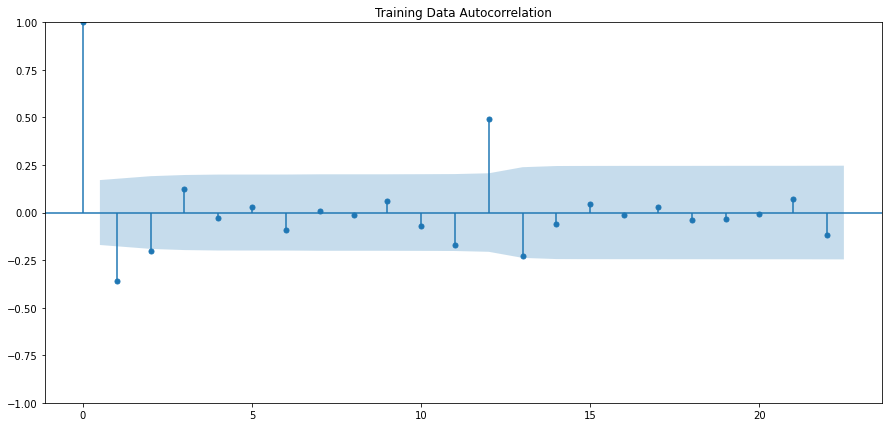

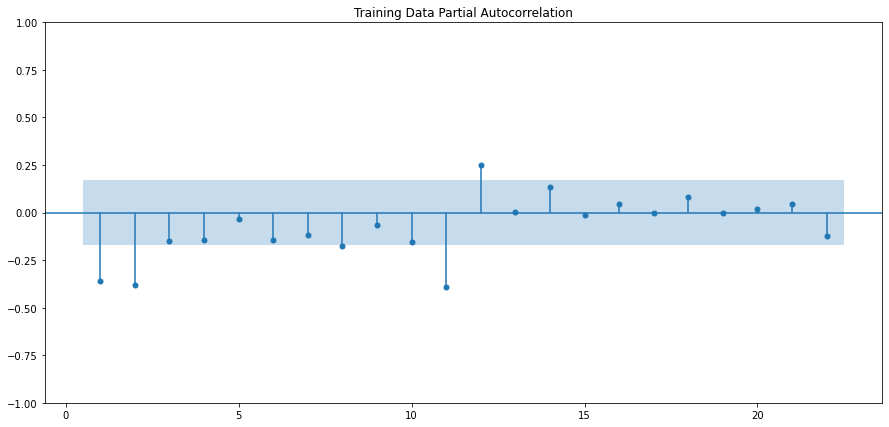

In [103]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 3.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 3.

By looking at the above plots, we will take the value of p and q to be 3 and 3 respectively.

In [104]:
manual_ARIMA = ARIMA(train['Rose'], order=(2,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -635.935
Date:                Sun, 19 Feb 2023   AIC                           1281.871
Time:                        22:09:55   BIC                           1296.247
Sample:                    01-01-1980   HQIC                          1287.712
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4540      0.469     -0.969      0.333      -1.372       0.464
ar.L2          0.0001      0.170      0.001      0.999      -0.334       0.334
ma.L1         -0.2541      0.459     -0.554      0.5

Let us analyse the residuals from the various diagnostics plot.

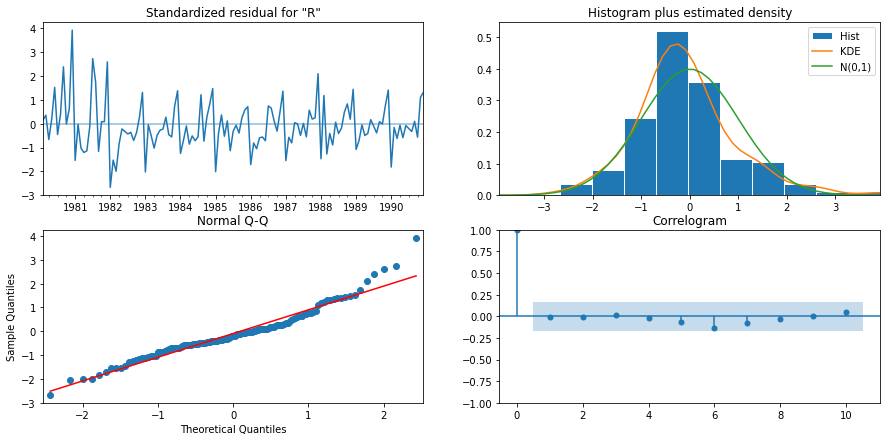

In [105]:
results_manual_ARIMA.plot_diagnostics();

## Predict on the Test Set using this model and evaluate the model.

In [106]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [107]:
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 36.82342004134083 
MAPE: 75.88057963274255


In [108]:
temp_resultsDf1 = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA Manual(2,1,2)'])

temp_resultsDf1

,RMSE,MAPE
"ARIMA Manual(2,1,2)",36.82342,75.88058


## Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

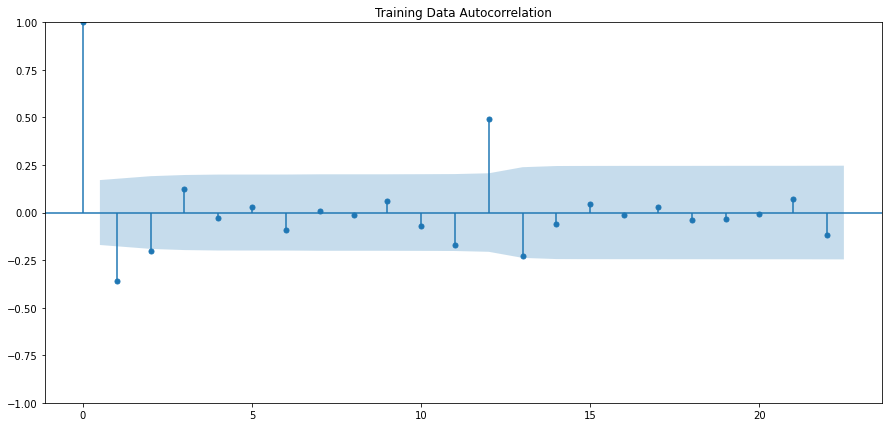

In [109]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop');

We can see that there is a seasonality.

In [110]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [111]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [112]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207243
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380892
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869386022
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635753245
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697521
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945759
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.555482591834
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383819
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.793632491779
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.7434330947276
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483305717
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866535878
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461667
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988665559725
SARIMA(0, 1, 2)x(0, 0, 

In [113]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 12)",887.937509
53,"(1, 1, 2)","(2, 0, 2, 12)",889.902465
80,"(2, 1, 2)","(2, 0, 2, 12)",890.668798
69,"(2, 1, 1)","(2, 0, 0, 12)",896.518161
78,"(2, 1, 2)","(2, 0, 0, 12)",897.346444


In [114]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.969
Date:                            Sun, 19 Feb 2023   AIC                            887.938
Time:                                    22:14:19   BIC                            906.448
Sample:                                01-01-1980   HQIC                           895.437
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8427    189.710     -0.004      0.996    -372.667     370.982
ma.L2         -0.1573     29.804   

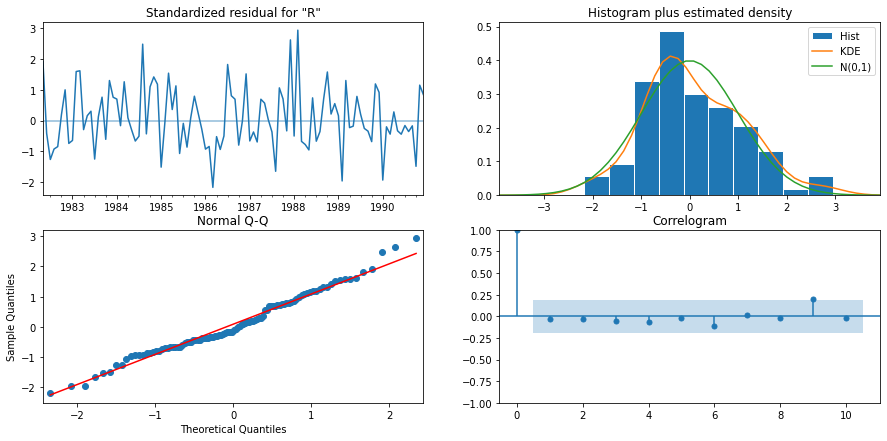

In [115]:
results_auto_SARIMA.plot_diagnostics();

## Predict on the Test Set using this model and evaluate the model.

In [116]:
predicted_auto_SARIMA = results_auto_SARIMA.forecast(steps=len(test))

In [117]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_auto_SARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 26.88086068673079 
MAPE: 54.75189905216114


In [118]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['SARIMA Auto(0,1,2)(2,0,2,12)'])


temp_resultsDf

,RMSE,MAPE
"SARIMA Auto(0,1,2)(2,0,2,12)",26.880861,54.751899


## Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 6.

Let us look at the ACF and the PACF plots once more.

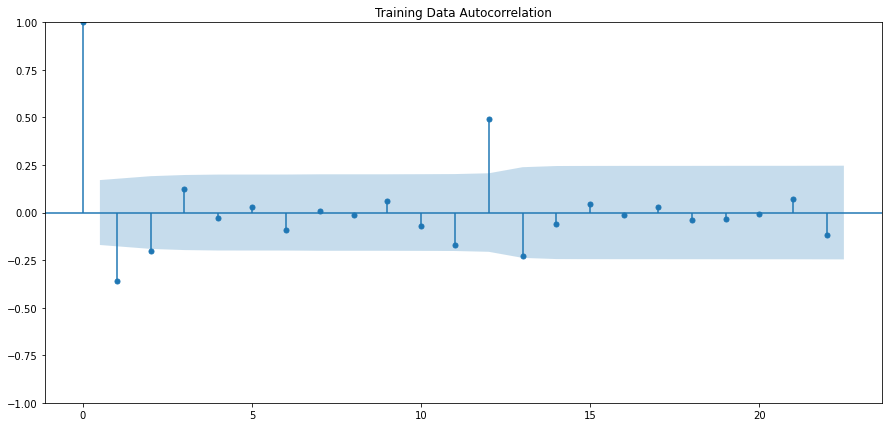

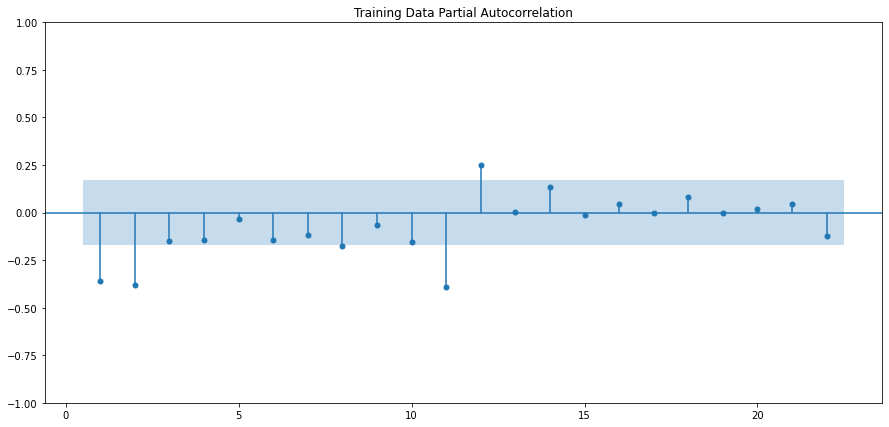

In [119]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle');

Here, we have taken alpha=0.05.


We are taking the p value to be 2 and the q value also to be 2 as the parameters same as the ARIMA model.

* The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 1. 
* The Moving-Average parameter in an SARIMA model is 'Q' which comes from the significant lag after which the ACF plot cuts-off to 1.

Remember to check the ACF and the PACF plots only at multiples of 3 (since 3 is the seasonal period).

Please do refer to $\href{https://online.stat.psu.edu/stat510/lesson/4/4.1}{this\ link}$ to read more about Seasonal Auto-Regressive Integrtaed Moving Average Models.

In [120]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(2,1,2),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                 Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -515.095
Date:                              Sun, 19 Feb 2023   AIC                           1044.191
Time:                                      22:14:27   BIC                           1063.466
Sample:                                  01-01-1980   HQIC                          1052.016
                                       - 12-01-1990                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5632      0.165     -3.407      0.001      -0.887      -0.239
ar.L2         -0.07

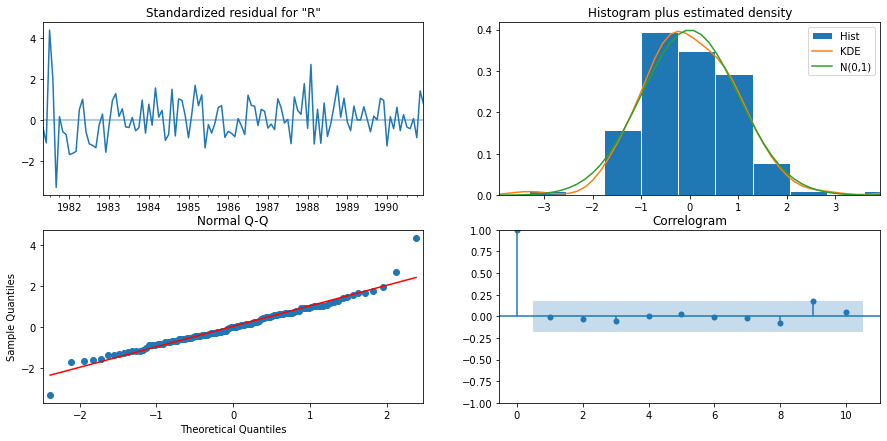

In [121]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [122]:
predicted_manual_SARIMA = results_manual_SARIMA.forecast(steps=len(test))

In [123]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_manual_SARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 21.493185188947674 
MAPE: 43.55424895524804


In [124]:
temp_resultsDf2 = pd.DataFrame({'RMSE': [rmse],'MAPE':mape}
                           ,index=['SARIMA Manual(2,1,2)(1,0,1,12)'])


temp_resultsDf2

,RMSE,MAPE
"SARIMA Manual(2,1,2)(1,0,1,12)",21.493185,43.554249


In [125]:
ARIMA_SARIMA=pd.concat([resultsDf,temp_resultsDf,temp_resultsDf1,temp_resultsDf2])
ARIMA_SARIMA

,RMSE,MAPE
"ARIMA Auto(2,1,3)",36.769752,75.672502
"SARIMA Auto(0,1,2)(2,0,2,12)",26.880861,54.751899
"ARIMA Manual(2,1,2)",36.823420,75.880580
"SARIMA Manual(2,1,2)(1,0,1,12)",21.493185,43.554249


In [126]:
complete=pd.concat([result_rose,ARIMA_SARIMA])

This is where our model building exercise ends. 

Please do try out with a different seasonal frequency parameter (if that works) and check whether that gives you a better RMSE value. Also, try taking different kinds of transformations as well.

## Building the most optimum model on the Full Data.

Here, we have a scenario where our training data was stationary but our full data was not stationary. So, we will use the same parameters as our training data but with adding a level of differencing which is needed for the data to be stationary.

In [127]:
full_data_model = sm.tsa.statespace.SARIMAX(rose['Rose'],
                                order=(2,1,2),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                 Rose   No. Observations:                  187
Model:             SARIMAX(2, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -733.287
Date:                              Sun, 19 Feb 2023   AIC                           1480.573
Time:                                      22:14:36   BIC                           1502.565
Sample:                                  01-01-1980   HQIC                          1489.496
                                       - 07-01-1995                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1284      0.072     15.642      0.000       0.987       1.270
ar.L2         -0.26

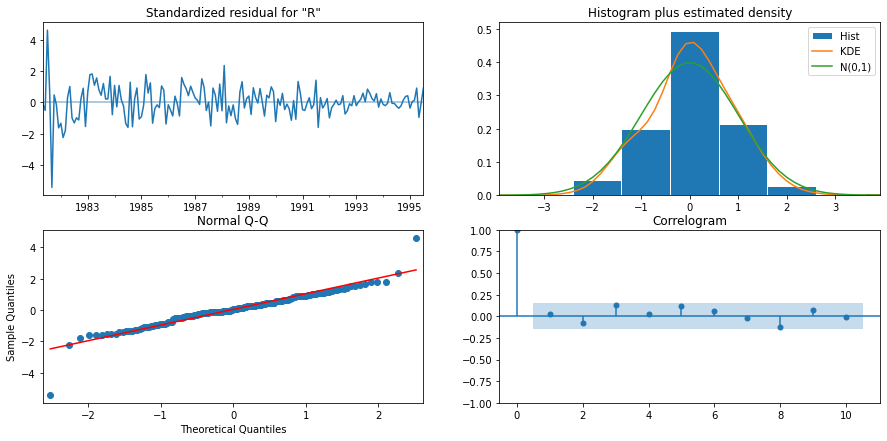

In [128]:
results_full_data_model.plot_diagnostics();

## Evaluate the model on the whole data and predict 12 months into the future (till the end of next year).

In [129]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [130]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-01,53.771712,16.276072,21.871197,85.672226
1995-09-01,47.310967,16.541589,14.890048,79.731887
1995-10-01,45.246664,16.544244,12.820541,77.672787
1995-11-01,51.992532,16.549625,19.555863,84.429200
1995-12-01,70.818895,16.552329,38.376926,103.260864
1996-01-01,34.174503,16.592257,1.654278,66.694729
1996-02-01,39.486354,16.678403,6.797286,72.175422
1996-03-01,42.717190,16.872504,9.647690,75.786690
1996-04-01,37.009126,17.148105,3.399457,70.618795
1996-05-01,41.458576,17.496565,7.165939,75.751212


In [131]:
rmse = mean_squared_error(rose['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 38.69167296680357


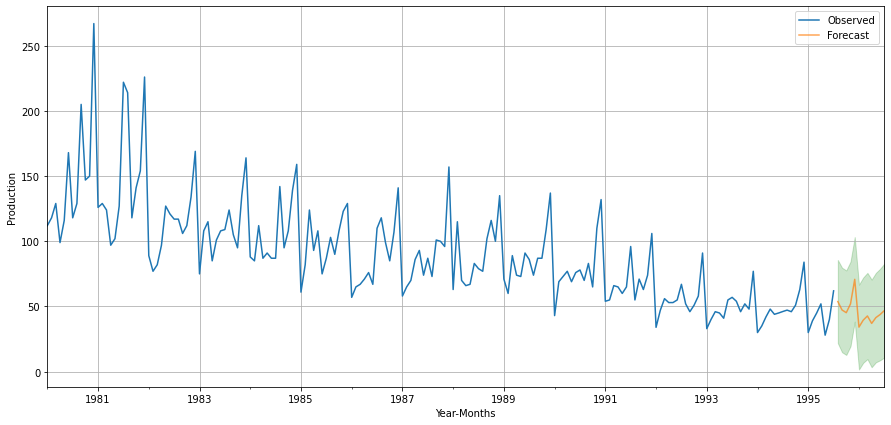

In [132]:
# plot the forecast along with the confidence band

axis = rose['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast',alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='green',alpha=0.2)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Production')
plt.legend(loc='best')
plt.grid()
plt.show();
